# Séries Temporais em dados de Covid

<img src="series.png">

- Nesta aula, vamos aprender como fazer uma análise exploratória visual simples para séries temporais

- Vamos ver também:
    - Uma análise Exploratória
    - Crescimento Exponencial
    - Novos casos e Aceleração sobre a transformada logaritmica
    - Média móvel e subnotificação
    - Correlação e Autocorrelação
    - Sazonalidade
[Mauricio Fell - Coronavirus e Vitórias-Régias](https://www.youtube.com/watch?v=s-lgS-4Xqy0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
import warnings
warnings.filterwarnings('ignore')

/home/clayton/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df_all = pd.read_csv('covid.csv', sep=' ')
df_all.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
# Filtrando os dados

df = df_all[df_all['estado'] != 'TOTAL']

# Alterando o campo data
df['data'] = pd.to_datetime(df_all['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

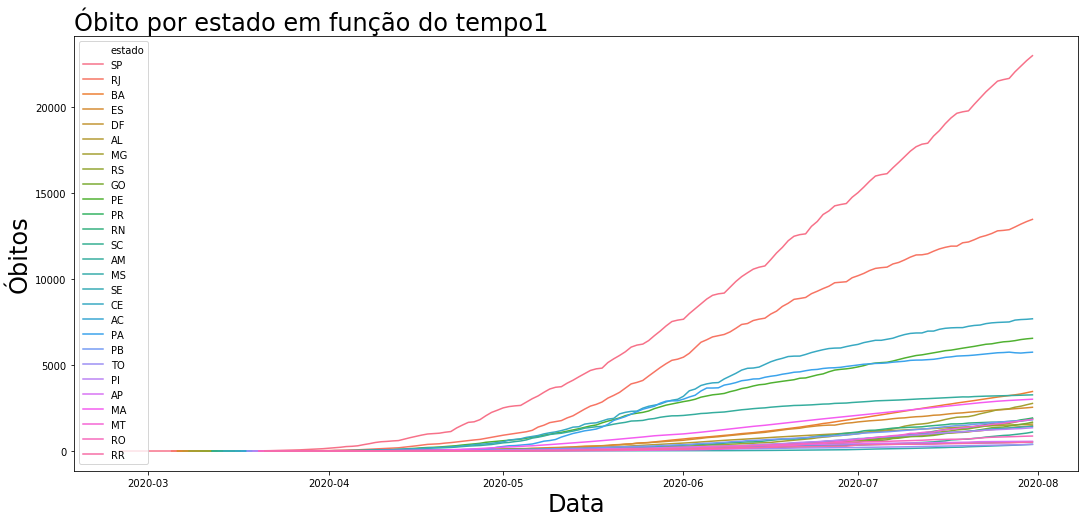

In [4]:
# Plotando Óbtos por estado

plt.figure(figsize=(18,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbito por estado em função do tempo1', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

In [5]:
# Plotando Óbtos por estado

#plt.figure(figsize=(18,8))
#fig = sns.barplot(x='data', y='Obitos', hue='estado', data=df)
#fig.set_title('Óbito por estado em função do tempo1', loc='left', fontsize=24)
#fig.set_xlabel('Data', fontsize=24)
#fig.set_ylabel('Óbitos', fontsize=24)

# Vamos analisar apenas o estado de São Paulo

In [6]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

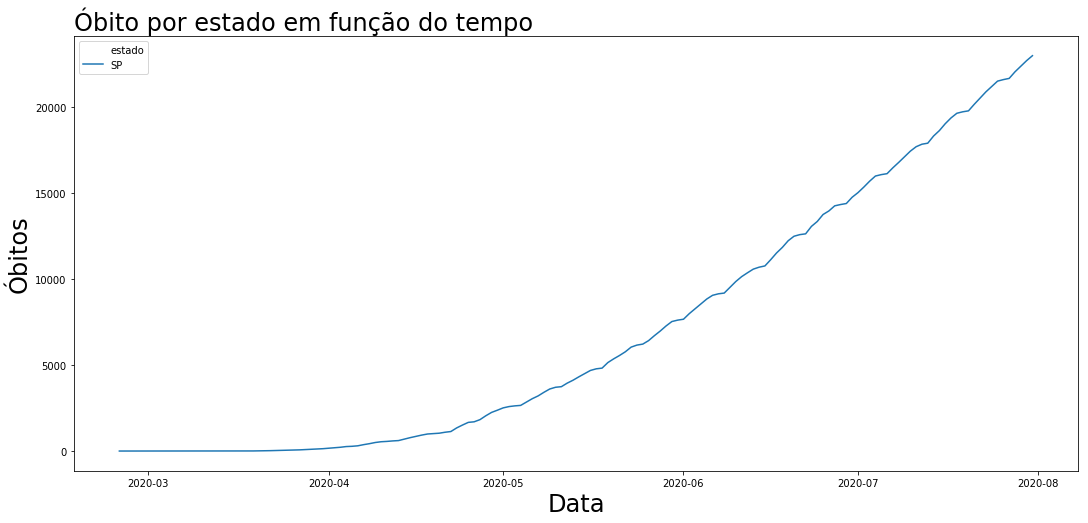

In [7]:
# Plotando Óbtos por estado

plt.figure(figsize=(18,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df_sp)
fig.set_title('Óbito por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

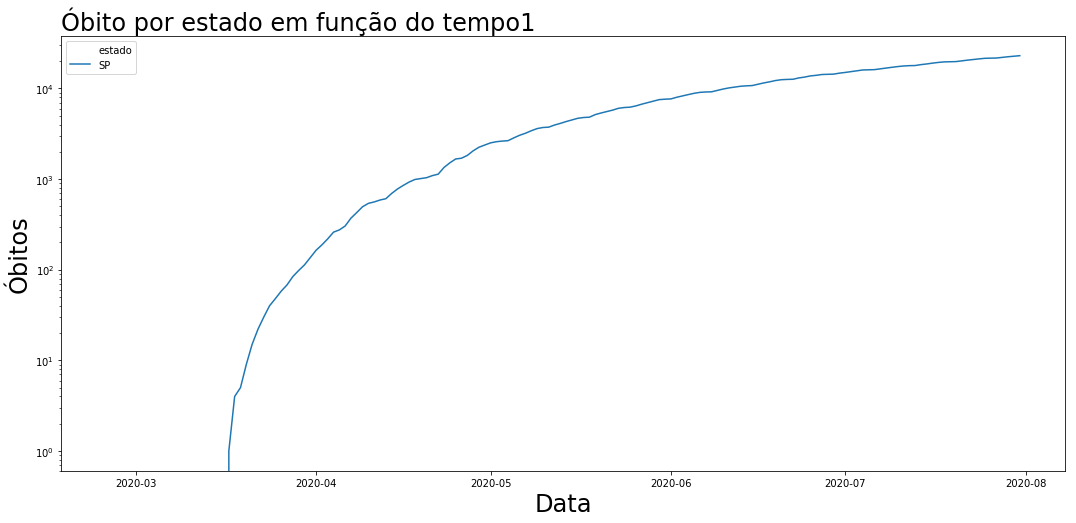

In [8]:
# Plotando Óbtos por estado

plt.figure(figsize=(18,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df_sp)
fig.set_title('Óbito por estado em função do tempo1', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
fig.set_yscale('log')

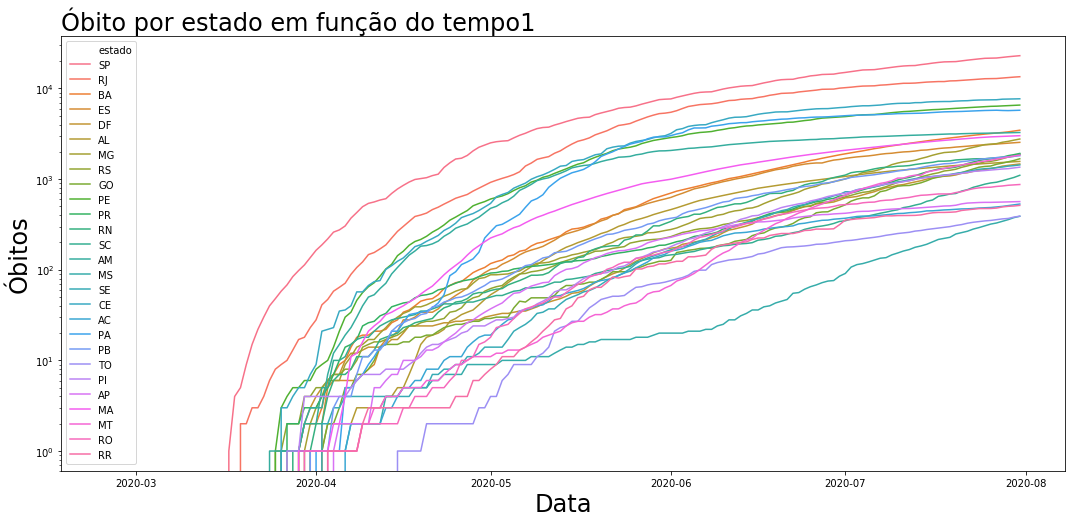

In [9]:
plt.figure(figsize=(18,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbito por estado em função do tempo1', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
fig.set_yscale('log')

In [10]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


## Analisando número de casos suspeitos em SP

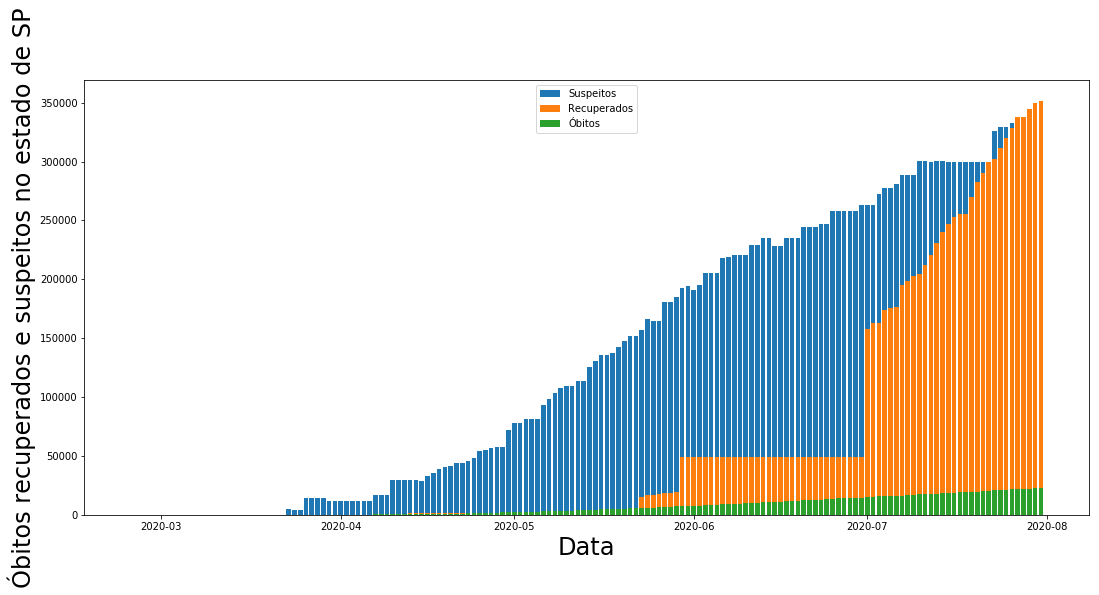

In [11]:
plt.figure(figsize=(18,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos recuperados e suspeitos no estado de SP', fontsize=24, rotation=90)
plt.legend()

# Criando métodos para os grafos

In [12]:
# Método utilizando seaborn

def plot_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)

In [13]:
# Método utilizando matplotlib

def plot_barr(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

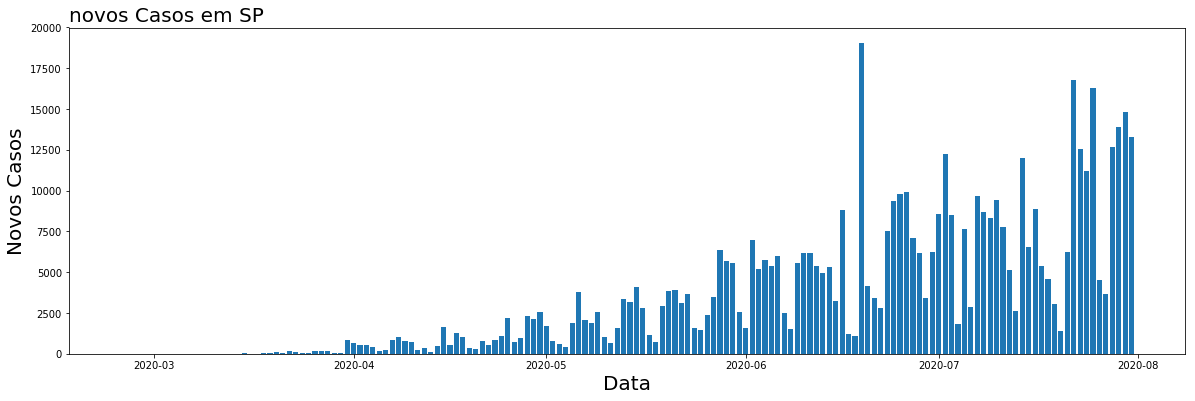

In [14]:
# Analisando novos casos

plot_barr('novos Casos em SP', 'Data', 'Novos Casos', 'data', 'novosCasos', df_sp)

In [15]:
# Encontrando a aceleração do numero de novos casos

df_sp['aceleraCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleraObitos'] = df_sp['novosObitos'].diff()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleraCasos,aceleraObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0


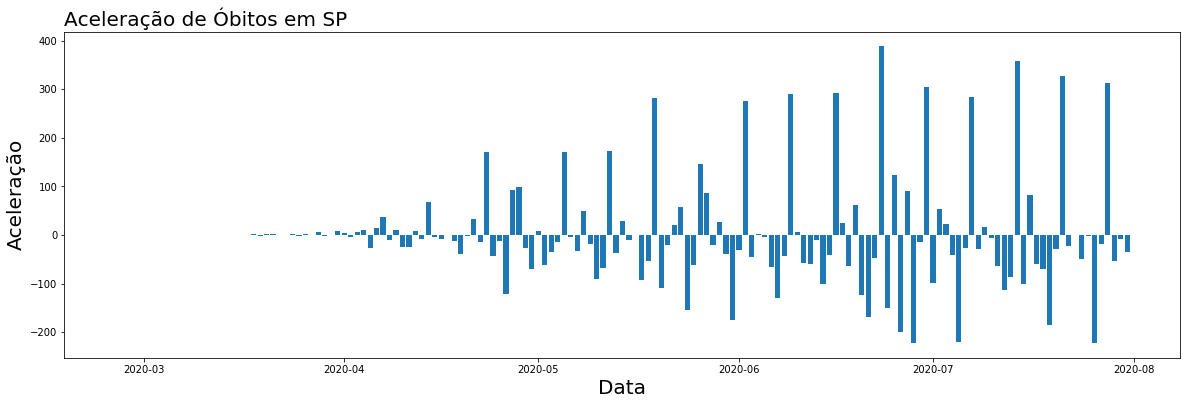

In [16]:
plot_barr('Aceleração de Óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleraObitos', df_sp)

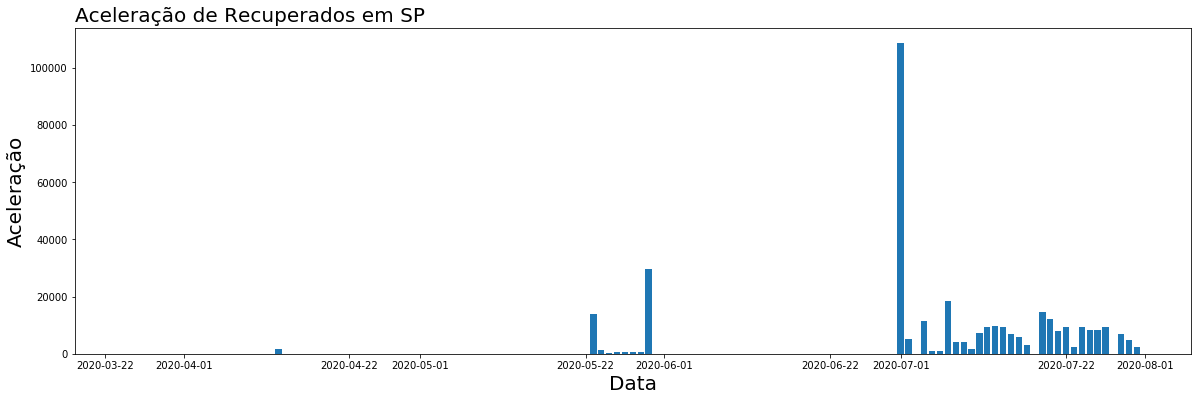

In [17]:
df_sp['aceleracaoRecuperados'] = df_sp['recuperados'].diff()
plot_barr('Aceleração de Recuperados em SP', 'Data', 'Aceleração', 'data', 'aceleracaoRecuperados', df_sp)

In [18]:
# Janela de novos óbitos
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7, center=False).mean()


# Janela de quarentena = 14
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14, center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleraCasos,aceleraObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN


<BarContainer object of 158 artists>

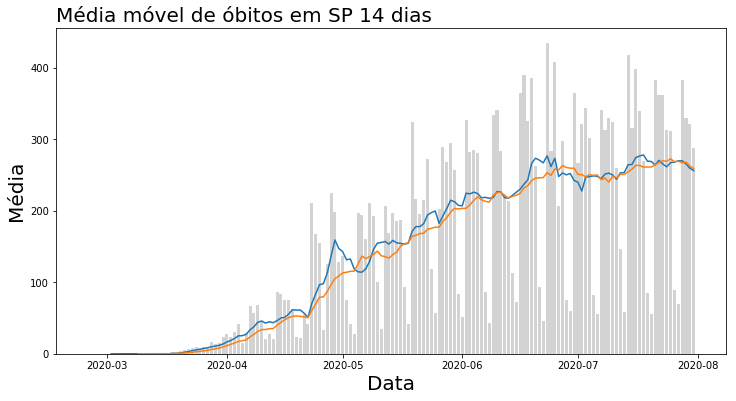

In [19]:
plot_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plot_linha('Média móvel de óbitos em SP 14 dias', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)

plt.bar(df_sp.data, df_sp.novosObitos, color='lightgrey')

# Autocorrelação

- Quando estamos falando de séries Temporais, utilização autocorrelação e não correlação, pq o tempo é uma vairável independente (caso ou obito por exemplo), para correlação, preciso de duas vairáveis.

- Para essa situação então iremos medir a autocorrelação individulmente das variáveis no período, sendo **lag** o nome dado a esse período.

<img src='autocorr.png'>


In [20]:
from pandas.plotting import autocorrelation_plot

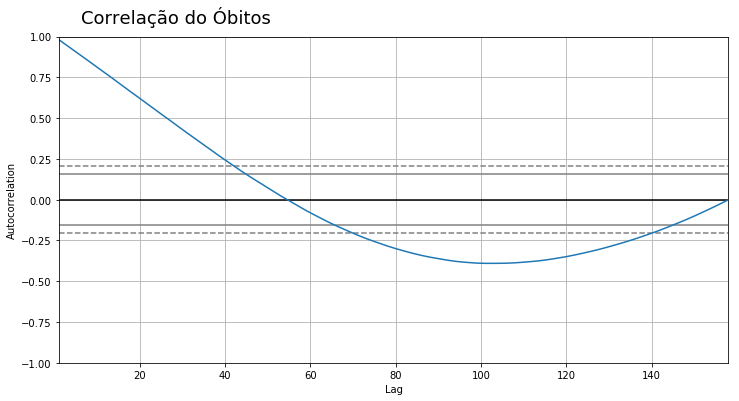

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.Obitos)
ax = ax

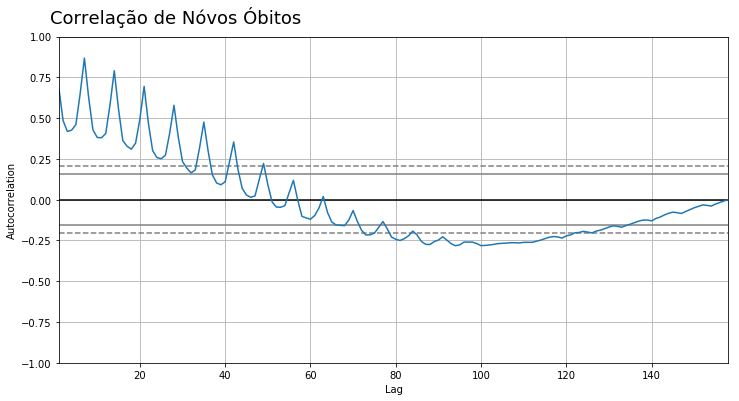

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Nóvos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.novosObitos)
ax = ax

## Vamos agora fazer a mesma análise que fizemos para a média móvel com os dados de Autocorrelação

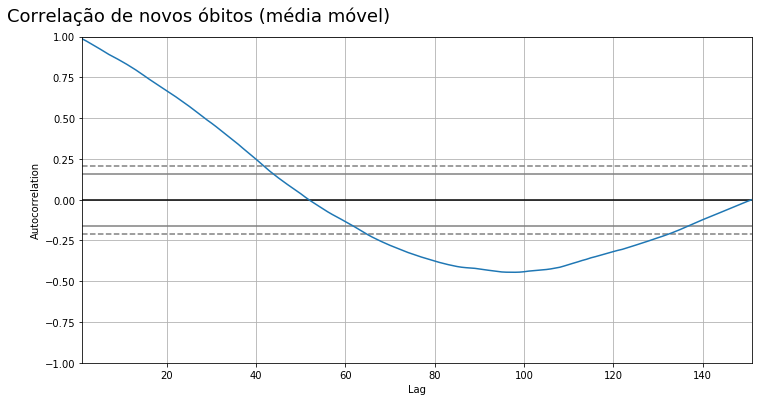

In [23]:
# Se obervarmos, temos o mesmo comportamento porém, sem aquelas ocilações decorrentes da sazonalidade

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de novos óbitos (média móvel)', fontsize=18, x = 0.26, y=0.95)
autocorrelation_plot(df_sp.mediaObitos[7:])
ax=ax

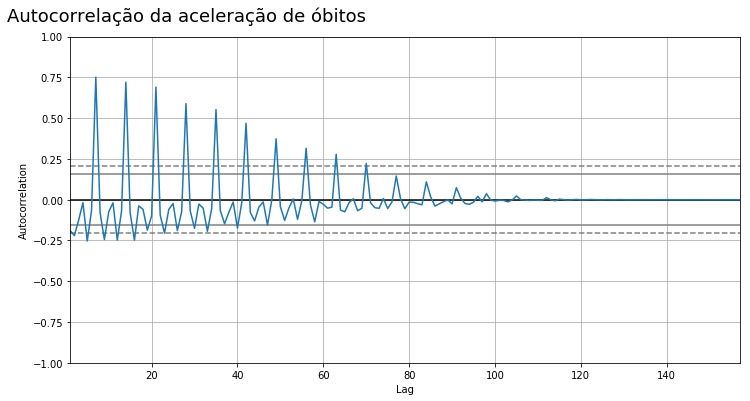

In [24]:
# Plotando a aceleração

ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18, x = 0.26, y=0.95)
autocorrelation_plot(df_sp.aceleraObitos[1:])
ax=ax

In [25]:
# Criando features dia/mês/ano

df_sp['mes'] = pd.to_datetime(df_sp.data)
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleraCasos,aceleraObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Saturday


In [26]:
dias = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta',
       'Saturday':'Sabado', 'Sunday':'Domingo'}
df_sp.dia_da_semana = df_sp['dia_da_semana'].map(dias)
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleraCasos,aceleraObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Sabado


In [27]:
agg_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleraObitos'].mean().round()
agg_sp['dia_da_semana'] = agg_sp.index
agg_sp.head(7)

,Obitos,novosObitos,aceleraObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sabado,6786.0,155.0,-17.0,Sabado
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Terça,6794.0,206.0,175.0,Terça


In [28]:
agg_sp = agg_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sabado'])
agg_sp.head(7)

,Obitos,novosObitos,aceleraObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sexta,7342.0,177.0,-13.0,Sexta
Sabado,6786.0,155.0,-17.0,Sabado


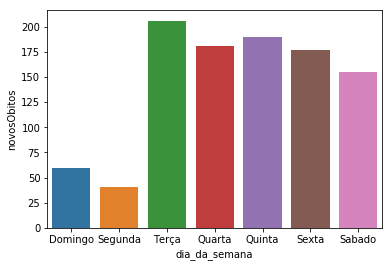

In [29]:
sns.barplot(agg_sp['dia_da_semana'],agg_sp.novosObitos)

In [30]:
# Comparando mês a mês

def cria_feat(df, label=None):
    df = df.copy()
    df['diadasemana'] = df.mes.dt.weekday
    df['diames'] = df.mes.dt.day
    df['mes'] = df.mes.dt.month
    
    X = df[['diadasemana','mes','diames']]
    
    if label:
        y=df[label]
        return X, y
    return x

In [31]:
X, y = cria_feat(df_sp, label='Obitos')

# Concat the dataset
df_final = pd.concat([X, y], axis=1)
df_final.head(10)

,diadasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


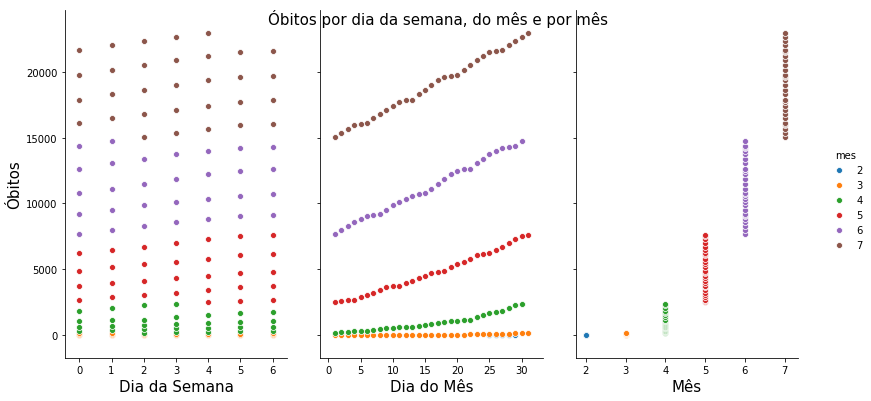

In [32]:
g = sns.pairplot(df_final.dropna(),
                hue='mes',
                x_vars=['diadasemana','diames','mes'],
                y_vars='Obitos')

g.fig.set_size_inches(12,6)

g.axes[0,0].set_xlabel('Dia da Semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do Mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, do mês e por mês', fontsize=15)
plt.show()

## Decompondo os dados históricos em tendências, sazonalidade e ruído

In [33]:
#!pip install --upgrade --no-deps statsmodels

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [35]:
resultados = seasonal_decompose(df_sp.novosObitos, period=14)
resultados

In [36]:
df_sp.index = pd.to_datetime(df_sp.data)

In [37]:
def plot_new(y1, y2, y3, cor1, cor2, cor3, lb1, lb2, lb3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=lb1)
    plt.plot(y2, color=cor2, label=lb2)
    plt.plot(y3, color=cor3, label=lb3)
    plt.legend(fontsize=18)

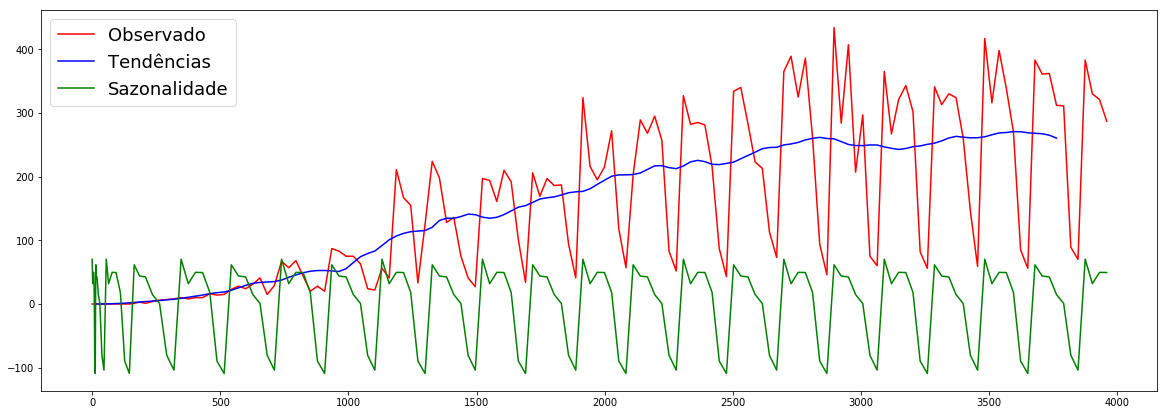

In [38]:
plot_new(resultados.observed, resultados.trend, resultados.seasonal,
        'red', 'blue', 'green', 'Observado', 'Tendências','Sazonalidade')

In [39]:
# Comparando o comportamento com outros estados

df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)

In [40]:
resultados_sp = seasonal_decompose(df_sp.novosObitos, period=7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, period=7)
resultados_rj = seasonal_decompose(df_rj.novosObitos, period=7)

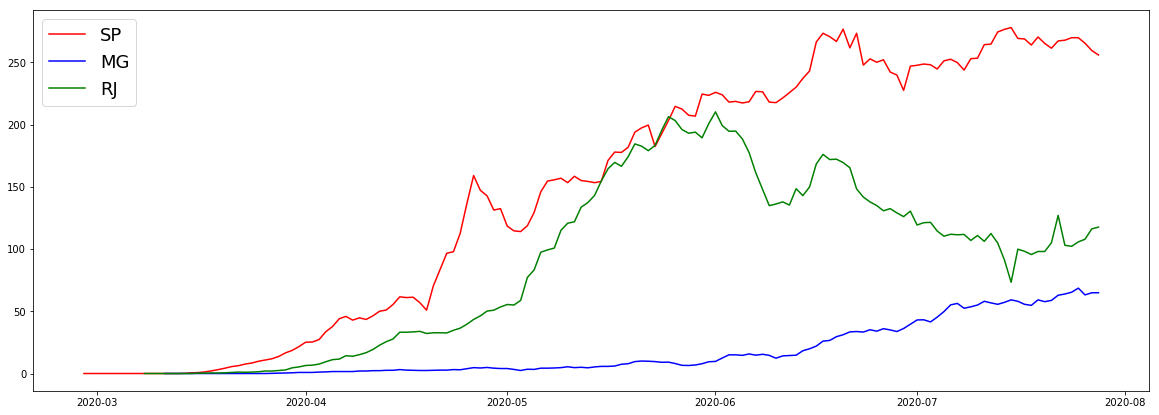

In [41]:
plot_new(resultados_sp.trend, resultados_mg.trend, resultados_rj.trend,
        'red', 'blue', 'green', 'SP', 'MG','RJ')

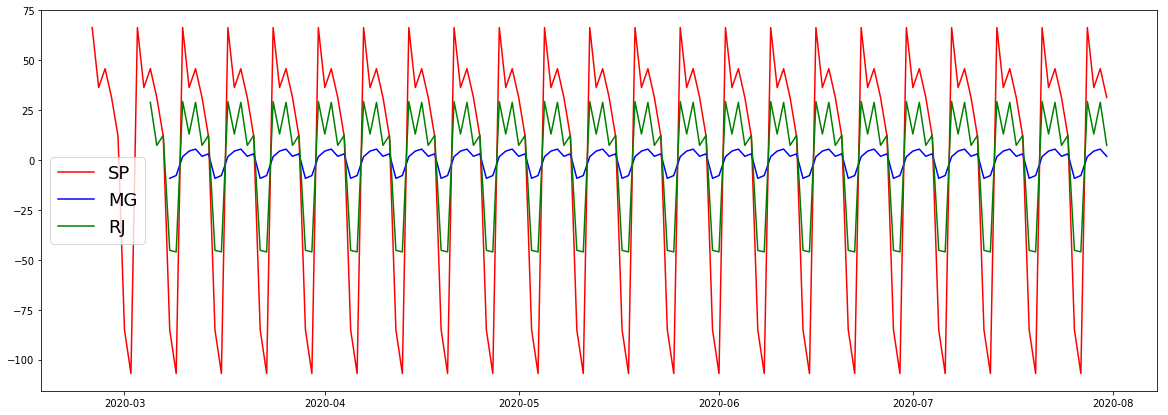

In [42]:
plot_new(resultados_sp.seasonal, resultados_mg.seasonal, resultados_rj.seasonal,
        'red', 'blue', 'green', 'SP', 'MG','RJ')

In [43]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [44]:
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

(1.3664743612803403,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [45]:
print('p-valor: ', adfuller(y.dropna())[1])

p-valor:  0.9969563888815705


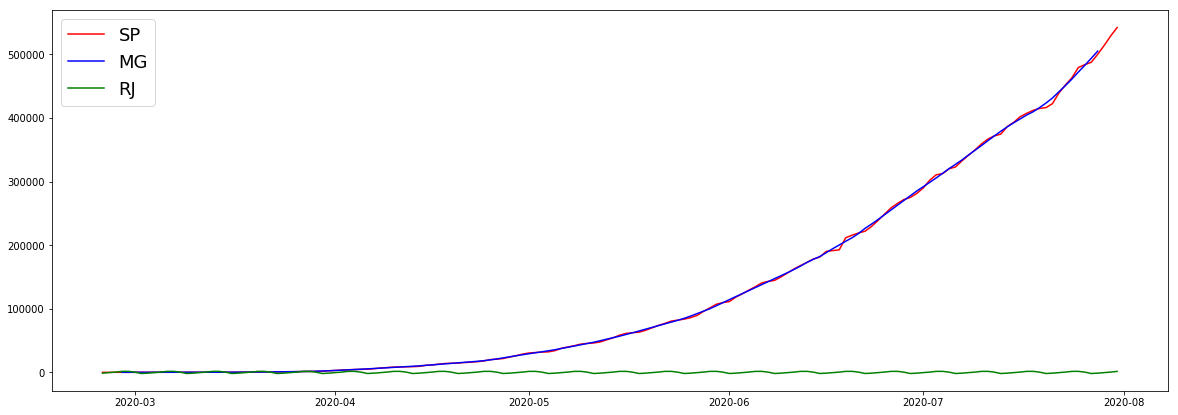

In [46]:
resultados_casos = seasonal_decompose(df_sp.Casos, period=7)
plot_new(resultados_casos.observed, resultados_casos.trend, resultados_casos.seasonal,
        'red', 'blue', 'green', 'SP', 'MG','RJ')

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
# Análise de Série Temporal com suas diferenciações

def plot_acf2(y1, y2, y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2ª Diferenciação')
    

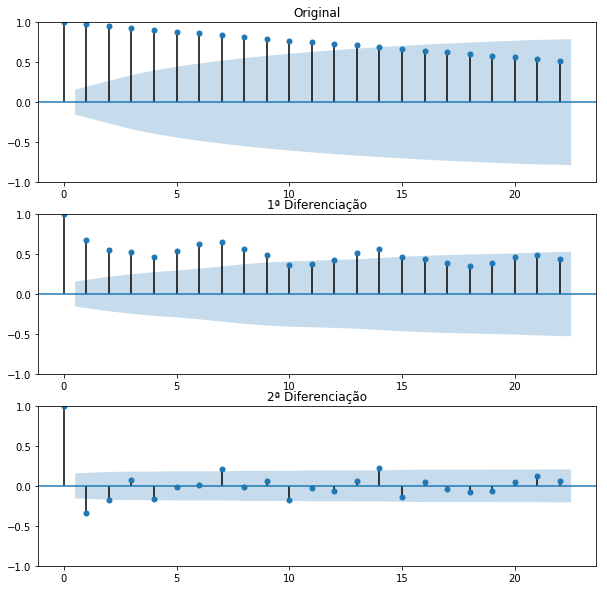

In [49]:
plot_acf2(y, y.diff().dropna(), y.diff().diff().dropna())

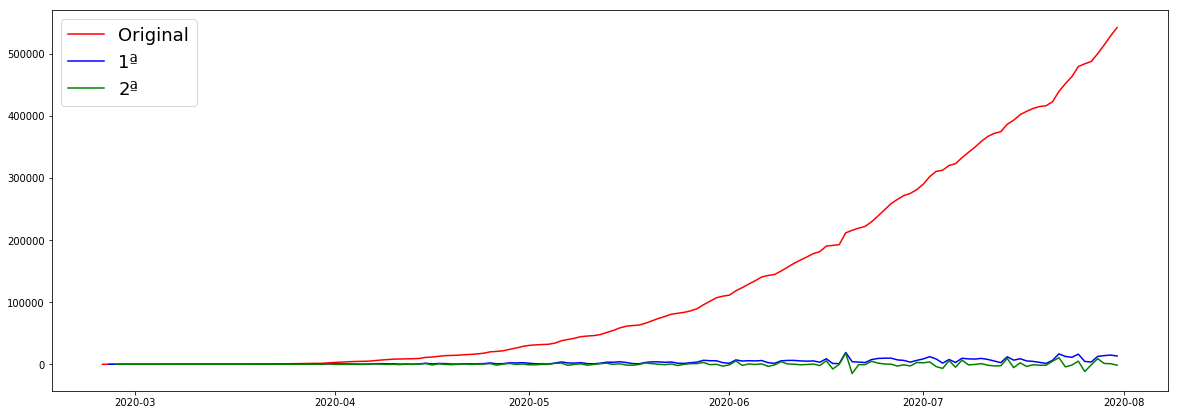

In [50]:
plot_new(y, y.diff(), y.diff().diff(),
        'red', 'blue', 'green', 'Original', '1ª','2ª')

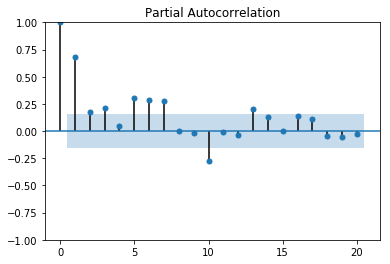

In [53]:
plot_pacf(y.diff().dropna(), lags=20);

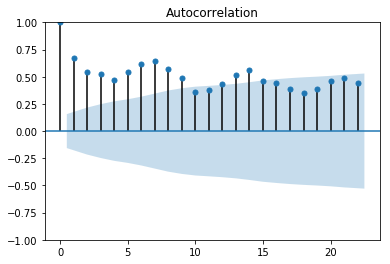

In [54]:
plot_acf(y.diff().dropna());

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [57]:
modelo = sm.tsa.arima.ARIMA(y, order=(1,1,1))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Casos   No. Observations:                  158
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1456.914
Date:                Fri, 18 Feb 2022   AIC                           2919.828
Time:                        14:50:55   BIC                           2928.997
Sample:                    02-25-2020   HQIC                          2923.552
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    182.299      0.000       0.989       1.011
ma.L1         -0.8471      0.035    -24.152      0.000      -0.916      -0.778
sigma2      6.673e+06   2.04e-09   3.28e+15      0.0

## ARIMA (Auto Regressive Integrated Moving Average)

- Um modelo ARIMA tem três “partes”: uma que define a ordem do modelo auto-regressivo **(AR -[p])**, uma 2ª que define se a série deve ser diferenciada (usualmente 1ª diferença) para que vire estacionária **(I - [d])** e uma terceira que define a ordem do modelo de médias móveis **(MA - [q])**.


<img src="https://www.midomenech.com.br/wp-content/uploads/2021/07/arima2.png" alt="ARIMA(p, d, q)" style="height: 300px; width:600px;"/>

### A figura apresenta:

 - Uma série que tem a função de autocorrelação (ACF) diminuindo exponencialmente e a função de autocorrelação parcial (PACF) com queda brusca após a 1ª defasagem (lag) define um modelo auto-regressivo de 1ª ordem **(Caso 5)**;
 
 - Se a queda brusca é no 2º lag, o modelo é auto-regressivo de ordem 2 **(Caso 1)**;
 
 - Se a função não é estacionária (é estacionária quando a série oscila em torno de uma média), deve-se diferenciar a série (tomar a primeira diferença móvel)**(Casos 2 e 3)**;
 
 - Se a função de autocorrelação parcial tem queda exponencial e a função de autocorrelação cai após o lag k, o modelo é de médias móveis de ordem k **(Casos 3 e 4)**;
 
 - Se as duas funções têm queda exponencial, o modelo terá componentes auto-regressivo e de médias móveis **(Caso 2)**.
 
 - Se a série não é estacionária na variância (ou seja, a variância aumenta ou diminui, com o aumento da média) a série deve ser transformada utilizando, por exemplo, a transformação Box-Cox **(Caso 2)**.

 
 
<img src="https://www.midomenech.com.br/wp-content/uploads/2021/07/arima3.png" alt="ARIMA(p, d, q)" style="height: 300px; width:600px;"/>


In [59]:
# Vetor de parâmetros

import itertools
p = d = q =range(0,2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [60]:
seasonal_pdq = [(x[0], x[1],x[2], 7) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

# Apresentando as saídas para o Sarimax

In [61]:
print('Combinações de parâmetros para o Arima sazonal\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Combinações de parâmetros para o Arima sazonal

SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [62]:
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [64]:
# Escolhendo a melhor combinação SARIMAX

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results= mod.fit()
        aic_lista.append('ARIMA{} x {} - AIC {}'.format(param, param_seasonal, results.aic))

In [65]:
aic_lista

['ARIMA(0, 0, 0) x (0, 0, 0, 7) - AIC 4312.204463385908',
 'ARIMA(0, 0, 0) x (0, 0, 1, 7) - AIC 4234.919433193472',
 'ARIMA(0, 0, 0) x (0, 1, 0, 7) - AIC 3562.871711196248',
 'ARIMA(0, 0, 0) x (0, 1, 1, 7) - AIC 3494.158268075541',
 'ARIMA(0, 0, 0) x (1, 0, 0, 7) - AIC 3850.09108974906',
 'ARIMA(0, 0, 0) x (1, 0, 1, 7) - AIC 3640.4087753998933',
 'ARIMA(0, 0, 0) x (1, 1, 0, 7) - AIC 3149.4467166147488',
 'ARIMA(0, 0, 0) x (1, 1, 1, 7) - AIC 3148.6559530781137',
 'ARIMA(0, 0, 1) x (0, 0, 0, 7) - AIC 4203.637153158772',
 'ARIMA(0, 0, 1) x (0, 0, 1, 7) - AIC 4186.578948235387',
 'ARIMA(0, 0, 1) x (0, 1, 0, 7) - AIC 3367.0926163086733',
 'ARIMA(0, 0, 1) x (0, 1, 1, 7) - AIC 3273.0519388715093',
 'ARIMA(0, 0, 1) x (1, 0, 0, 7) - AIC 4175.643287397979',
 'ARIMA(0, 0, 1) x (1, 0, 1, 7) - AIC 4177.5335462872445',
 'ARIMA(0, 0, 1) x (1, 1, 0, 7) - AIC 3247.9376376307814',
 'ARIMA(0, 0, 1) x (1, 1, 1, 7) - AIC 3402.9716369919106',
 'ARIMA(0, 1, 0) x (0, 0, 0, 7) - AIC 3140.724225355021',
 'ARIMA

In [67]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Casos   No. Observations:                  158
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1369.893
Date:                           Fri, 18 Feb 2022   AIC                           2749.787
Time:                                   15:13:19   BIC                           2764.840
Sample:                               02-25-2020   HQIC                          2755.903
                                    - 07-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    199.740      0.000       0.990       1.010
ma.L1         -0.9323      0.026    -35.386

In [68]:
modelo = sm.tsa.statespace.SARIMAX(y,
                                  order=(1,1,1),
                                  seasonal_order=(1,1,1,7))
results = mod.fit()

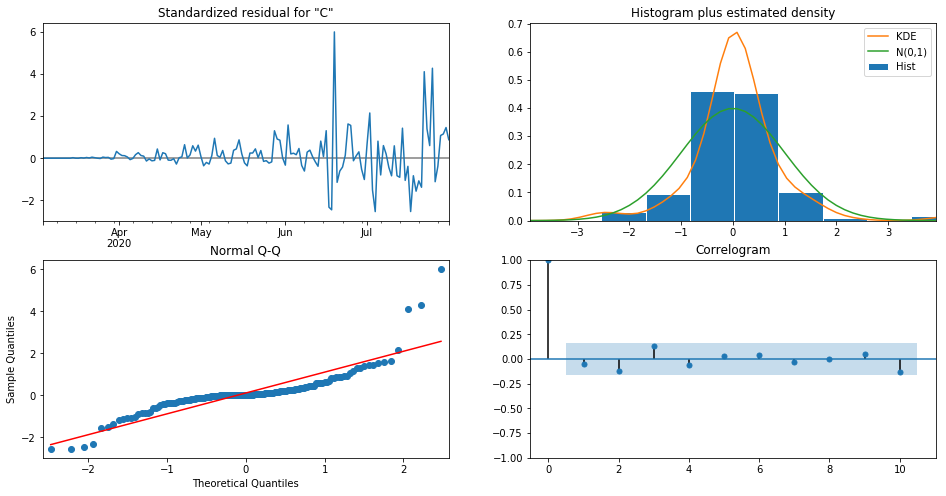

In [69]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

## Iniciando o processo de Predição

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2020-07-01,284123.556351,292788.154985
2020-07-02,293087.203373,301751.799583
2020-07-03,309712.964250,318377.558349
2020-07-04,313808.557929,322473.150191
2020-07-05,314049.656706,322714.247369
2020-07-06,320494.662851,329159.252122
2020-07-07,327045.788542,335710.377652
2020-07-08,336585.482215,345250.070101
2020-07-09,346345.248585,355009.835272
2020-07-10,356625.587323,365290.172967


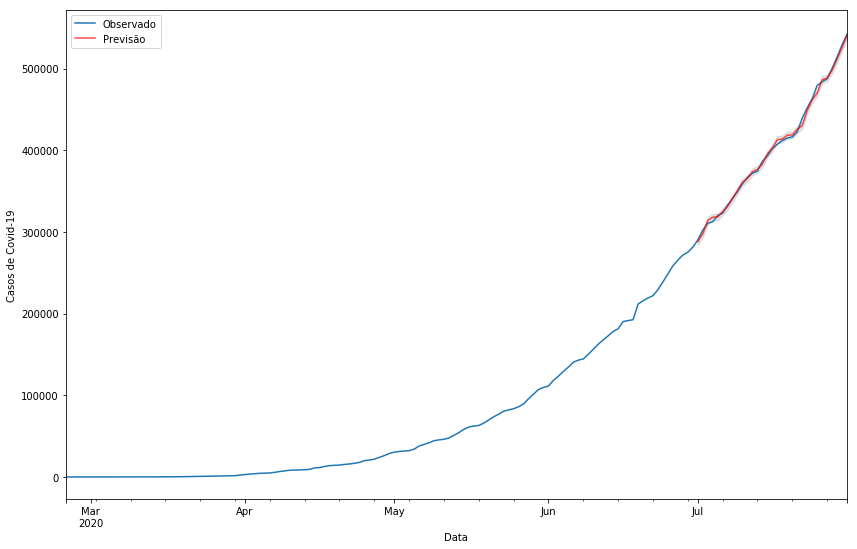

In [79]:
# Observado (dados que já tenho conhecimento)
ax = y['2020'].plot(label='Observado')

# Calcular a média móvel
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,9)) # predição
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1) # inter. Confiança
ax.set_xlabel('Data')
ax.set_ylabel('Casos de Covid-19')
plt.legend()
plt.show()

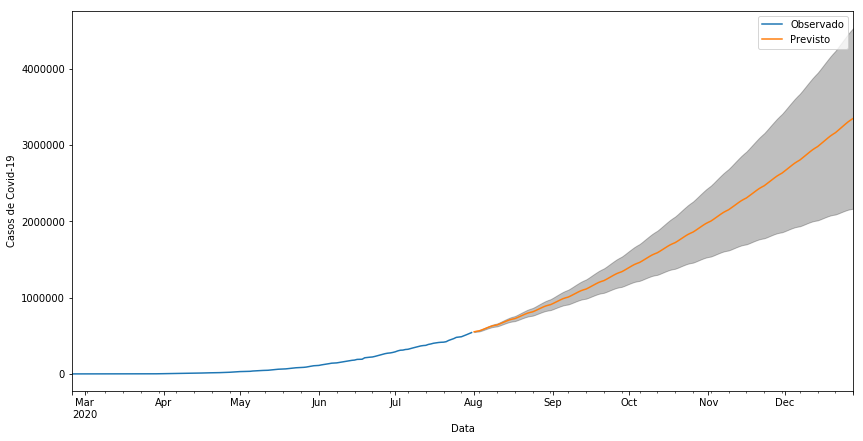

In [82]:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')

ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de Covid-19')
plt.legend()
plt.show()


In [83]:
# Importando todos os dados até 2021

df_atualizado = pd.read_csv('cases-brazil-states-att.csv', sep=' ')
df_atualizado = df_atualizado[df_atualizado['state'] == 'SP']
df_atualizado = df_atualizado.rename(columns={'date':'data'})
df_atualizado.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [84]:
# Confirmando o tipo data

df_atualizado['data'] = pd.to_datetime(df_atualizado['data']).dt.date
df_atualizado.index = df_atualizado['data']
df_atualizado.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


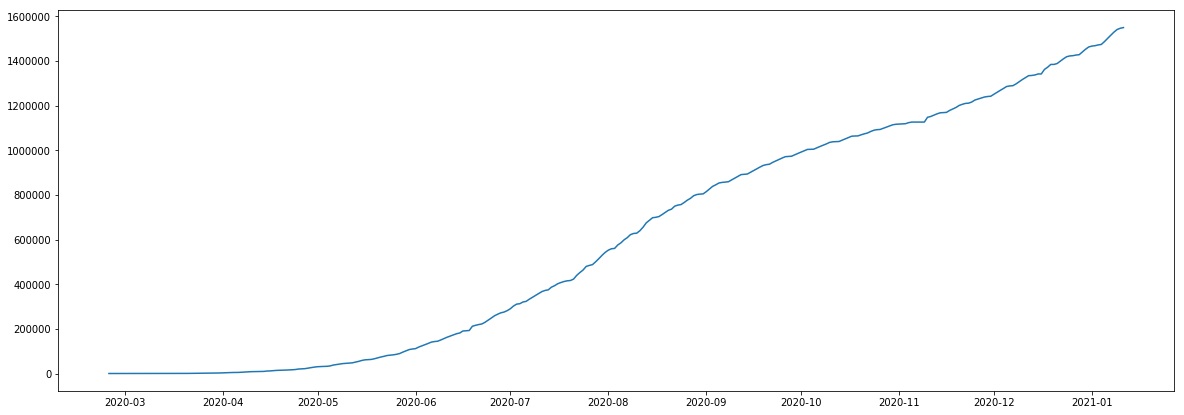

In [85]:
# Vamos repitir o grafo apresentado acima
# Grafico dos dados até janeiro de 2021

x = df_atualizado['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x, label='Correto')

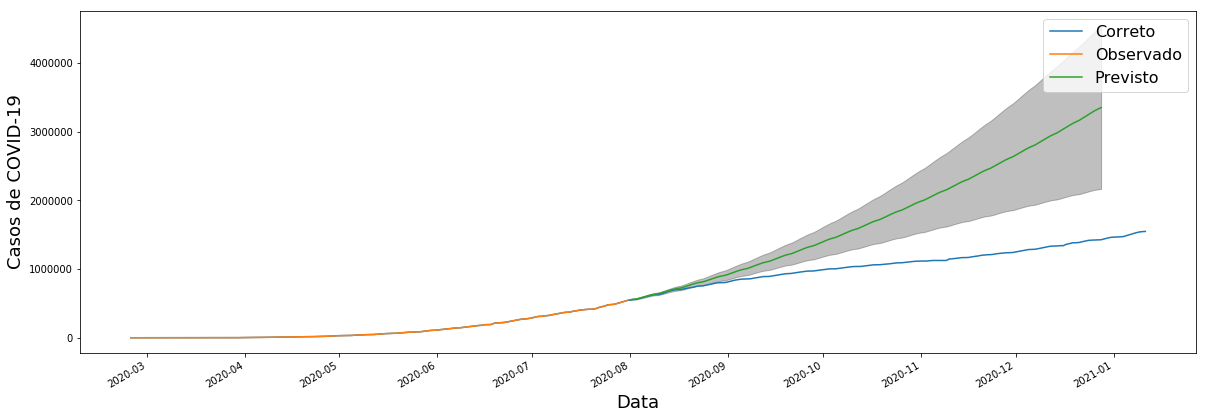

In [86]:
# Adidionando a predição ao gráfo


x = df_atualizado['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x, label='Correto')
ax = y.plot(label='Observado') # y = dados até julho que já utilizamos
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data', fontsize=18)
ax.set_ylabel('Casos de COVID-19', fontsize=18)
plt.legend(fontsize=16)
plt.show()

## Resultado do Plot

- Sabemos que utilizamos alguns dados do que aconteceu e também da nossa previsão. Podemos reparar então que ela de fato foi seguindo o que estava acontecendo antes, o comportamento que tínhamos era exponencial até julho, nossa previsão continuou seguindo nesse comportamento exponencial.

- É possível verificar também um certo achatamento na curva, ou seja, possívelmente fruto das ações tomadas nessa época para evitar contágio, como diminuir a circulação de pessoas por exemplo. Muitas dessas ações de fato ajudaram a minumizar a quantidade de casos que a princípio teria seguido esse comportamento mais exponencial se não tivéssemos feito nada.

- O que podemos perceber disso é que durante esse primeiro mês de previsão tivemos um comportamento muito parecido, e à medida que o tempo vai passando essa previsão fica um pouco menos correta, porque está mudando o comportamento, tem outras variáveis que implicam, isso é uma questão da série temporal. A série temporal tem características muito voláteis. As coisas vão mudando muito rápido.

- O fato de ter acontecido talvez o lockdown em algumas cidades específicas do Estado de São Paulo com certeza também diminuiu essa previsão, e vale deixar uma fica, se estou trabalhando com previsão, não adianta querer prever muito tempo para a frente, estarmos buscando prever o comportamento para 150 dias é muito difícil acertar.
